In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measures = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest = session.query(measures.date).order_by(measures.date.desc()).first()
print(latest)

('2017-08-23',)


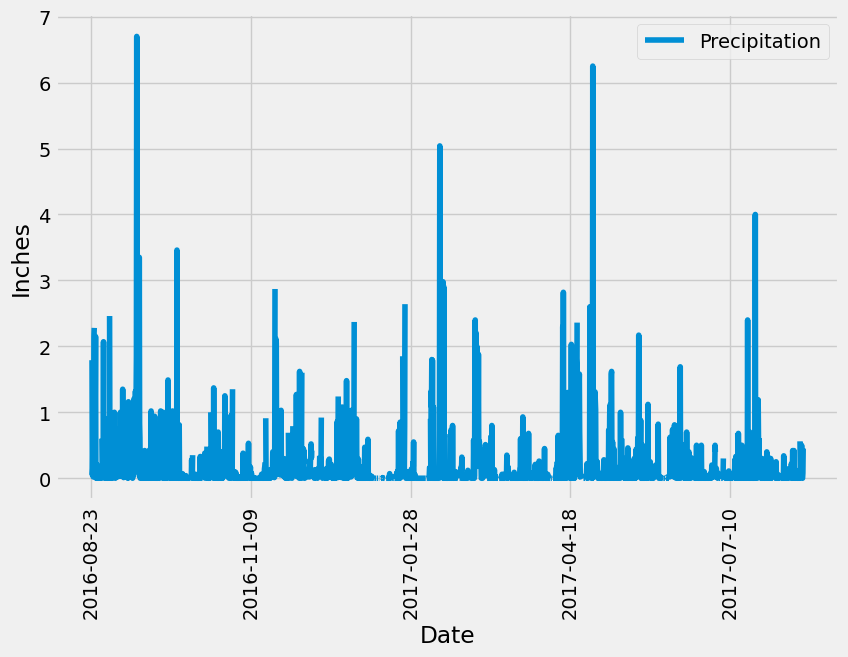

In [10]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Plot correctly drawn with help from classmate James Montomery in study group.  I had a df with an extra index, not with the Date as the index

# Calculate the date one year from the last date in data set.
year_earlier = dt.date(2017, 8, 23) - dt.timedelta(days=365)

precip = session.query(measures.date, measures.prcp).\
    filter(measures.date >= year_earlier).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
weather_df = pd.DataFrame(precip, columns = ['Date', 'Precipitation'])
weather_df.set_index('Date', inplace = True)
# Sort the dataframe by date
weather_df = weather_df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
weather_df.plot( label = 'precipitation', figsize = (9, 6))

plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc="best");

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
weather_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(stations).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(measures.station, func.count(measures.station)).group_by(measures.station).\
order_by(func.count(measures.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_activity[0][0]

stats = session.query(func.min(measures.tobs), func.max(measures.tobs), func.avg(measures.tobs)).filter(measures.station == most_active)
stats[0]

(54.0, 85.0, 71.66378066378067)

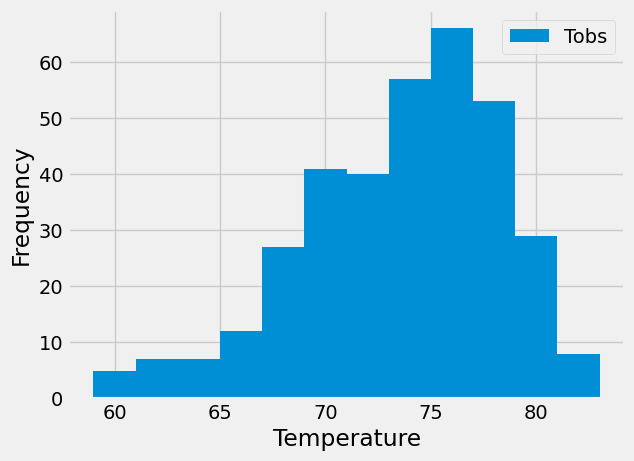

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measures.tobs).\
    filter(measures.date >= year_earlier).\
    filter(measures.station == most_active).\
    all()
temps = [row.tobs for row in temps] 

# Save the query results as a Pandas series. 
temps = pd.Series(temps)

# Use Pandas Plotting with Matplotlib to plot the data

plt.hist(temps, bins = 12, label = 'Tobs')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="best");


# Close Session

In [16]:
# Close Session
session.close()